In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
import seaborn as sns

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.shape

(891, 12)

In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Divide into age-groups
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)

bins = [-1,0,5,12,18,24,35,60,np.inf]
labels = ['UNK','Baby','Child','Teenager','Student','Youth','Adult','SeniorCitizen']

train['AgeGroup'] = pd.cut(train['Age'],bins,labels=labels)
test['AgeGroup'] = pd.cut(test['Age'],bins,labels=labels)

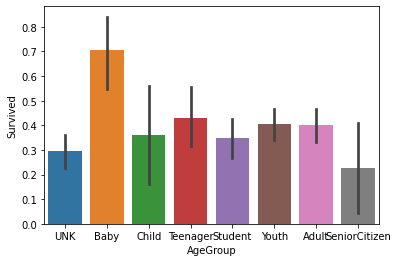

In [9]:
# Plot age v/s survived

sns.barplot(x = train['AgeGroup'], y = train['Survived'])

In [10]:
combine = [train,test]
for x in combine:
    x['Title'] = x.Name.str.extract('([A-Za-z]+)\.',expand = False)
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [11]:
for x in combine:
    x['Title'] = x['Title'].replace(['Capt','Col','Don','Dr','Jonkheer','Major','Dona'],'Rare')
    x['Title'] = x['Title'].replace(['Countess','Lady','Ms','Mlle','Mme','Ms'],'Mrs')
    
train[['Title','Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.697802
2,Mr,0.156673
3,Mrs,0.801527
4,Rare,0.357143
5,Rev,0.000000
6,Sir,1.000000


In [12]:
## Drop cabin,age(age-group),name
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Youth,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Youth,Mr


In [13]:
train = train.drop(columns = ['Name','Age','Cabin','Ticket','Fare'],axis=1)
test = test.drop(columns = ['Name','Age','Cabin','Ticket','Fare'],axis=1)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,male,1,0,S,Student,Mr
1,2,1,1,female,1,0,C,Adult,Mrs
2,3,1,3,female,0,0,S,Youth,Miss
3,4,1,1,female,1,0,S,Youth,Mrs
4,5,0,3,male,0,0,S,Youth,Mr


In [15]:
combine = [train,test]
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for x in combine:
    x['Title'] = x['Title'].map(title_mapping)
    x['Title'] = x['Title'].fillna(0)


In [16]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,male,1,0,S,Student,1.0
1,2,1,1,female,1,0,C,Adult,3.0
2,3,1,3,female,0,0,S,Youth,2.0
3,4,1,1,female,1,0,S,Youth,3.0
4,5,0,3,male,0,0,S,Youth,1.0


In [17]:
sex_mapping = {"male" : 1, "female" : 2}
for x in combine:
    x['Sex'] = x['Sex'].map(sex_mapping)
    x['Sex'] = x['Sex'].fillna(0)

age_grp = {'UNK' : 0,'Baby' : 1,'Child' : 2,'Teenager' : 3,'Student' : 4,'Youth' : 5,'Adult' : 6,'SeniorCitizen' : 7}
for x in combine:
    x['AgeGroup'] = x['AgeGroup'].map(age_grp)
    x['AgeGroup'] = x['AgeGroup'].fillna(0)
train.head(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,1,1,0,S,4,1.0
1,2,1,1,2,1,0,C,6,3.0
2,3,1,3,2,0,0,S,5,2.0
3,4,1,1,2,1,0,S,5,3.0
4,5,0,3,1,0,0,S,5,1.0


In [18]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
embarked = {'S' : 1,'C' : 2,'Q' : 3,'nan' : 4}
for x in combine:
    x['Embarked'] = x['Embarked'].map(embarked)
    x['Embarked'] = x['Embarked'].fillna(0)
train.head(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,1,1,0,1.0,4,1.0
1,2,1,1,2,1,0,2.0,6,3.0
2,3,1,3,2,0,0,1.0,5,2.0
3,4,1,1,2,1,0,1.0,5,3.0
4,5,0,3,1,0,0,1.0,5,1.0


# Apply Machine Learning ALgorithm

We will try multiple classification algorithms : Decision Trees, Random Forest, KNN

# KNN Algorithm

In [20]:
## KNN 
from sklearn.neighbors import KNeighborsClassifier
knn = train.iloc[:,1:]
knn.head()


,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title
0,0,3,1,1,0,1.0,4,1.0
1,1,1,2,1,0,2.0,6,3.0
2,1,3,2,0,0,1.0,5,2.0
3,1,1,2,1,0,1.0,5,3.0
4,0,3,1,0,0,1.0,5,1.0


In [21]:
X = knn.iloc[:,1:9].values
y = knn.iloc[:,0].values
print(X.shape)

(891, 7)


In [22]:
## Test Data
test_X = test.iloc[:,1:]
test_X

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title
0,3,1,0,0,3,5,1.0
1,3,2,1,0,1,6,3.0
2,2,1,0,0,3,7,1.0
3,3,1,0,0,1,5,1.0
4,3,2,1,1,1,4,3.0
...,...,...,...,...,...,...,...
413,3,1,0,0,1,0,1.0
414,1,2,0,0,2,6,6.0
415,3,1,0,0,1,6,1.0
416,3,1,0,0,1,0,1.0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [24]:
sc_X = StandardScaler()
train_X = sc_X.fit_transform(X)
test_X = sc_X.transform(test_X)

clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p=2)
clf.fit(train_X,y)
y_pred = clf.predict(test_X)

In [25]:
#Create an ouput submission file
y_pred = pd.Series(y_pred)
op = pd.concat([test['PassengerId'],y_pred],axis=1)
op.columns = ['PassengerId','Survived']
op

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [26]:
evalu = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
evalu

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [27]:
#Accuracy 
from sklearn.metrics import accuracy_score
y_predicted = np.array(op['Survived'])
y_groundtruth = np.array(evalu['Survived'])
acc = accuracy_score(y_groundtruth,y_predicted)
acc

0.8397129186602871

# Random Forest

In [28]:
## Test Data
test_X = test.iloc[:,1:]
test_X

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title
0,3,1,0,0,3,5,1.0
1,3,2,1,0,1,6,3.0
2,2,1,0,0,3,7,1.0
3,3,1,0,0,1,5,1.0
4,3,2,1,1,1,4,3.0
...,...,...,...,...,...,...,...
413,3,1,0,0,1,0,1.0
414,1,2,0,0,2,6,6.0
415,3,1,0,0,1,6,1.0
416,3,1,0,0,1,0,1.0


In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = train
rf.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,1,1,0,1.0,4,1.0
1,2,1,1,2,1,0,2.0,6,3.0
2,3,1,3,2,0,0,1.0,5,2.0
3,4,1,1,2,1,0,1.0,5,3.0
4,5,0,3,1,0,0,1.0,5,1.0


In [30]:
X = rf.iloc[:,2:9].values
y = rf.iloc[:,1].values


In [31]:
sc_X = StandardScaler()
train_X = sc_X.fit_transform(X)
test_X = sc_X.transform(test_X)

clf = RandomForestClassifier(n_estimators = 1000,criterion='entropy',random_state = 0)
clf.fit(train_X,y)
y_pred = clf.predict(test_X)

In [32]:
#Create an ouput submission file
y_pred = pd.Series(y_pred)
op = pd.concat([test['PassengerId'],y_pred],axis=1)
op.columns = ['PassengerId','Survived']
op

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [33]:
#Accuracy 
from sklearn.metrics import accuracy_score
y_predicted = np.array(op['Survived'])
y_groundtruth = np.array(evalu['Survived'])
acc = accuracy_score(y_groundtruth,y_predicted)
acc

0.8397129186602871

In [34]:
output = op.to_csv('result.csv')

# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = train.iloc[:,1:]
dt.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title
0,0,3,1,1,0,1.0,4,1.0
1,1,1,2,1,0,2.0,6,3.0
2,1,3,2,0,0,1.0,5,2.0
3,1,1,2,1,0,1.0,5,3.0
4,0,3,1,0,0,1.0,5,1.0


In [36]:
X = knn.iloc[:,1:9].values
y = knn.iloc[:,0].values

In [37]:
sc_X = StandardScaler()
train_X = sc_X.fit_transform(X)
test_X = sc_X.transform(test_X)

clf = DecisionTreeClassifier(criterion='entropy',random_state = 0)
clf.fit(train_X,y)
y_pred = clf.predict(test_X)


In [38]:
#Create an ouput submission file
y_pred = pd.Series(y_pred)
op = pd.concat([test['PassengerId'],y_pred],axis=1)
op.columns = ['PassengerId','Survived']
op

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [39]:
#Accuracy 
from sklearn.metrics import accuracy_score
y_predicted = np.array(op['Survived'])
y_groundtruth = np.array(evalu['Survived'])
acc = accuracy_score(y_groundtruth,y_predicted)
acc

0.6172248803827751

As we can see KNN and Rnadom Forest have given the best accuracy we will generate csv of that algo only